<>:15: SyntaxWarning: invalid escape sequence '\T'
<>:15: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_26868\836649309.py:15: SyntaxWarning: invalid escape sequence '\T'
  labels_df = pd.read_excel("data\TRAIN\TRAINING_SOLUTIONS.xlsx")


Text(0, 0.5, 'subjects')

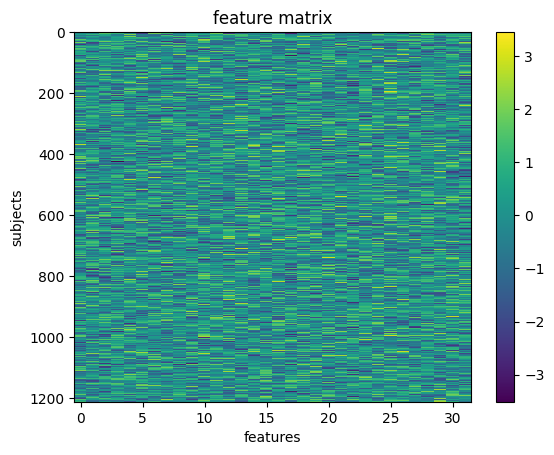

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Load your data
fmri_df = pd.read_csv("train_fmri.csv")
labels_df = pd.read_excel("data\TRAIN\TRAINING_SOLUTIONS.xlsx")

merged_df = pd.merge(fmri_df, labels_df[['participant_id', 'Sex_F']], on='participant_id')

# Prepare features and labels
X = merged_df.drop(columns=["Unnamed: 0", "participant_id", "Sex_F"])
y = merged_df["Sex_F"]
X_scaled = StandardScaler().fit_transform(X)


plt.imshow(X_scaled, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

In [2]:
y.shape

(1213,)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle = True, stratify = y, random_state=123)
print('training', len(X_train), 'testing', len(X_test))

training 970 testing 243


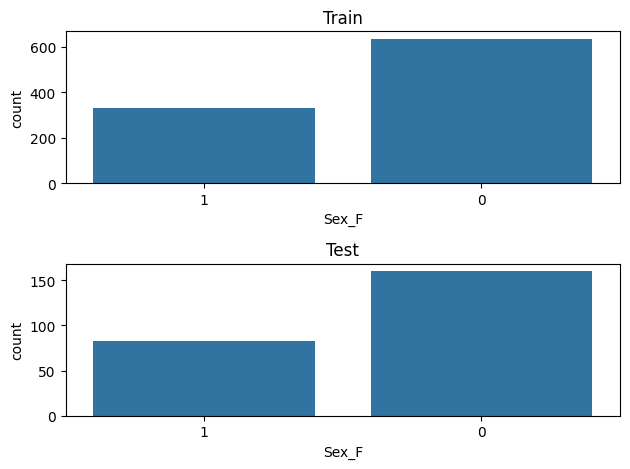

In [4]:
fig,(ax1,ax2) = plt.subplots(2)
sns.countplot(x=y_train, ax=ax1, order=[1,0])
ax1.set_title('Train')
sns.countplot(x=y_test, ax=ax2, order=[1,0])
ax2.set_title('Test')
plt.tight_layout()

FIRST MODEL: SVC

In [ ]:
from sklearn.svm import SVC
l_svc = SVC(kernel='linear', class_weight='balanced') # define the model

l_svc.fit(X_train, y_train) # fit the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score

# predict the training data based on the model
y_pred = l_svc.predict(X_train)

# calculate the model accuracy
acc = l_svc.score(X_train, y_train)

# calculate the model precision, recall and f1, all in one convenient report!
cr = classification_report(y_true=y_train,
                      y_pred = y_pred)

# get a table to help us break down these scores
cm = confusion_matrix(y_true=y_train, y_pred = y_pred)

In [ ]:
import itertools
from pandas import DataFrame

# print results
print('accuracy:', acc)
print(cr)

# plot confusion matrix
cmdf = DataFrame(cm, index = [1,0], columns = [1,0])
sns.heatmap(cmdf, cmap = 'RdBu_r')
plt.xlabel('Predicted')
plt.ylabel('Observed')
# label cells in matrix
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white")

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# predict
y_pred = cross_val_predict(l_svc, X_train, y_train,
                           groups=y_train, cv=3)
# scores
acc = cross_val_score(l_svc, X_train, y_train,
                     groups=y_train, cv=3)

In [ ]:
for i in range(len(acc)):
    print('Fold %s -- Acc = %s'%(i, acc[i]))

In [ ]:
from sklearn.metrics import accuracy_score
overall_acc = accuracy_score(y_pred = y_pred, y_true = y_train)
overall_cr = classification_report(y_pred = y_pred, y_true = y_train)
overall_cm = confusion_matrix(y_pred = y_pred, y_true = y_train)
print('Accuracy:',overall_acc)
print(overall_cr)

In [ ]:
thresh = overall_cm.max() / 2
cmdf = DataFrame(overall_cm, index = ['Female','Male'], columns = ['Female','Male'])
sns.heatmap(cmdf, cmap='copper')
plt.xlabel('Predicted')
plt.ylabel('Observed')
for i, j in itertools.product(range(overall_cm.shape[0]), range(overall_cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(overall_cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white")

In [ ]:
from sklearn.model_selection import permutation_test_score
score, permutation_score, pvalue = permutation_test_score(
    l_svc, X_train, y_train, cv=3, scoring="accuracy",
    n_jobs=2, n_permutations=100)
print(f'accuracy {score}, average permutation accuracy {permutation_score.mean()}, p value {pvalue}')

In [ ]:
# Scale the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scl = scaler.transform(X_train)

In [ ]:
plt.imshow(X_train, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title('Training Data')
plt.xlabel('features')
plt.ylabel('subjects')

In [ ]:
plt.imshow(X_train_scl, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title('Scaled Training Data')
plt.xlabel('features')
plt.ylabel('subjects')

In [ ]:
# repeat the steps above to re-fit the model
# and assess its performance

# don't forget to switch X_train to X_train_scl

# predict
y_pred = cross_val_predict(l_svc, X_train_scl, y_train,
                           groups=y_train, cv=3)

# get scores
overall_acc = accuracy_score(y_pred = y_pred, y_true = y_train)
overall_cr = classification_report(y_pred = y_pred, y_true = y_train)
overall_cm = confusion_matrix(y_pred = y_pred, y_true = y_train)
print('Accuracy:',overall_acc)
print(overall_cr)

# plot
thresh = overall_cm.max() / 2
cmdf = DataFrame(overall_cm, index = ['Female','Male'], columns = ['Female','Male'])
sns.heatmap(cmdf, cmap='copper')
plt.xlabel('Predicted')
plt.ylabel('Observed')
for i, j in itertools.product(range(overall_cm.shape[0]), range(overall_cm.shape[1])):
        plt.text(j+0.5, i+0.5, format(overall_cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white")

In [ ]:
l_svc.coef_

In [ ]:
plt.bar(range(l_svc.coef_.shape[-1]), l_svc.coef_[0])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


# initialize correlation measure, set to vectorize
correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                         discard_diagonal=True)

In [ ]:
!pip install nilearn

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline components
scaler = StandardScaler()
pca = PCA(n_components=0.95)  # retain 95% of variance

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Combine everything in a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('xgb', xgb)
])

# Perform RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the pipeline
search.fit(X_train, y_train)

# Predict and evaluate
y_pred = search.predict(X_test)

print("Best Parameters:\n", search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:
 {'xgb__subsample': 0.6, 'xgb__n_estimators': 200, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.99      0.79       160
           1       0.33      0.01      0.02        83

    accuracy                           0.65       243
   macro avg       0.50      0.50      0.41       243
weighted avg       0.55      0.65      0.53       243

Confusion Matrix:
 [[158   2]
 [ 82   1]]
